# Taller 1 Santiago Najar

A lo largo de este taller trabajaremos en el caso de AIRBNB que busca descubrir patrones, tendencias y oportunidades que puedan ser de interés para un inversionista de un apartamento.

Dicho esto es importante mencionar que para este analisis nuestra variable de interes va a ser el precio  diario al que es rentado el inmueble. Esto debido a que un inversionista busca maximar el precio al que puede rentar su apartamento para obtener un mayor ROI.

In [36]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
data = pd.read_csv("/content/listings.csv", encoding="utf-8", delimiter = ',', header  = 0)
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3686,Vita's Hideaway,4645,Vita,NaN,Historic Anacostia,38.863390,-76.988890,Private room,67.0,31,84,2023-08-30,0.51,1,321,2,NaN
1,3943,Historic Rowhouse Near Monuments,5059,Vasa,NaN,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.911950,-77.004560,Private room,82.0,1,504,2024-06-09,2.74,5,313,34,Hosted License: 5007242201001033
2,4197,Capitol Hill Bedroom walk to Metro,5061,Sandra,NaN,"Capitol Hill, Lincoln Park",38.887190,-76.994720,Private room,135.0,7,61,2024-06-09,0.33,2,335,8,Hosted License: 5007242201000749
3,4529,Bertina's House Part One,5803,Bertina,NaN,"Eastland Gardens, Kenilworth",38.905850,-76.944690,Private room,66.0,30,102,2019-07-05,0.56,2,179,0,Exempt
4,5589,Cozy apt in Adams Morgan,6527,Ami,NaN,"Kalorama Heights, Adams Morgan, Lanier Heights",38.918870,-77.040080,Entire home/apt,NaN,31,96,2023-08-17,0.53,1,10,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4923,1180032778137941348,New Petworth Apt with Parking,2485625,Myriam,NaN,"Brightwood Park, Crestwood, Petworth",38.945373,-77.029161,Entire home/apt,90.0,3,0,NaN,NaN,1,325,0,Hosted License: 5007242201003472
4924,1180068635623402520,Charming private studio,49673813,Meron,NaN,"Friendship Heights, American University Park, ...",38.947192,-77.076122,Entire home/apt,140.0,25,0,NaN,NaN,2,294,0,Exempt
4925,1180457128823921234,Cozy Transportation-Friendly Home in Fort Totten,583839206,Azeb,NaN,"North Michigan Park, Michigan Park, University...",38.953540,-76.992253,Entire home/apt,180.0,2,0,NaN,NaN,1,355,0,Hosted License: 5007242201003410<br />Unhosted...
4926,1180735218341618545,"Spacious 3BR Home, Near Metro",583891577,Guillermo,NaN,"Takoma, Brightwood, Manor Park",38.956423,-77.004918,Entire home/apt,127.0,31,0,NaN,NaN,1,329,0,NaN


## Entendimiento de Datos


Lo primero que haremos es revisar el diccionario de datos. Aca encontraremos las variables que quedaron registradas en la toma de datos.

Procederé a realizar una limpieza de variables que conceptualmente no pueden afectar el precio del inmueble y por lo tanto no es de interes para este analisis. Esto nos permitirá reducir el ruido entre los datos.

In [4]:
columns_to_drop = ['id', 'name', 'host_name','neighbourhood_group', 'latitude', 'longitude',
                   'last_review', 'calculated_host_listings_count','license']

data_cleaned = data.drop(columns=columns_to_drop)
data_cleaned


,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm
0,4645,Historic Anacostia,Private room,67.0,31,84,0.51,321,2
1,5059,"Edgewood, Bloomingdale, Truxton Circle, Eckington",Private room,82.0,1,504,2.74,313,34
2,5061,"Capitol Hill, Lincoln Park",Private room,135.0,7,61,0.33,335,8
3,5803,"Eastland Gardens, Kenilworth",Private room,66.0,30,102,0.56,179,0
4,6527,"Kalorama Heights, Adams Morgan, Lanier Heights",Entire home/apt,NaN,31,96,0.53,10,1
...,...,...,...,...,...,...,...,...,...
4923,2485625,"Brightwood Park, Crestwood, Petworth",Entire home/apt,90.0,3,0,NaN,325,0
4924,49673813,"Friendship Heights, American University Park, ...",Entire home/apt,140.0,25,0,NaN,294,0
4925,583839206,"North Michigan Park, Michigan Park, University...",Entire home/apt,180.0,2,0,NaN,355,0
4926,583891577,"Takoma, Brightwood, Manor Park",Entire home/apt,127.0,31,0,NaN,329,0


In [5]:
data_cleaned.shape

(4928, 9)

De esta manera quedamos con 8 variables que pueden afectar nuestra variable de interes precio.


Ahora procederemos a realizar un analisis para cumplir con los suspuestos principales de manejo de datos.


### Completitud

En esta sección, analizaremos la completitud de los datos; es decir, que no hayan valores vacíos.

In [6]:
data_cleaned.notnull().mean() * 100

,0
host_id,100.000000
neighbourhood,100.000000
room_type,100.000000
price,84.902597
minimum_nights,100.000000
number_of_reviews,100.000000
reviews_per_month,84.882305
availability_365,100.000000
number_of_reviews_ltm,100.000000


Vemos que el nuestra variable de interes está completa en un 84.9%. Como es un 15% de datos nulos y es la variable sobre la que queremos concluir no nos va a aservir tener esos valores nulos. Asi pues procederemos a borrar los registros donde no tienen precio.

In [7]:
# Eliminar los registros donde el precio sea nulo
data_cleaned = data_cleaned.dropna(subset=['price'])

data_cleaned.notnull().mean() * 100

,0
host_id,100.000000
neighbourhood,100.000000
room_type,100.000000
price,100.000000
minimum_nights,100.000000
number_of_reviews,100.000000
reviews_per_month,86.830784
availability_365,100.000000
number_of_reviews_ltm,100.000000


Ahora vemos que hay algunos registros donde el reviews por mes estan incompletos. Faltan un 14% de los datos.  Para esta variable vamos a realizar una imputación de vecinos.

Esta estrategia consta en hallar patrones con datos correlacionados y remplazar el valor nulo por una aproximación de este patron.

Esta estrategia la escogí dado que conceptualmente el numero de reviews por mes debe estar correlacionado con el numero de reviews total o con el numero de reviews en un año (ltm). Por ende es razonable proponer esta imputación.

In [10]:
imputer = KNNImputer(n_neighbors=5)

# Usar .loc para evitar el SettingWithCopyWarning
data_cleaned.loc[:, 'reviews_per_month'] = imputer.fit_transform(data_cleaned[['reviews_per_month']])


In [11]:
data_cleaned.notnull().mean() * 100

,0
host_id,100.0
neighbourhood,100.0
room_type,100.0
price,100.0
minimum_nights,100.0
number_of_reviews,100.0
reviews_per_month,100.0
availability_365,100.0
number_of_reviews_ltm,100.0


Siendo asi vemos ahora una completitud de nuestros datos del 100% para los registros. Hemos finalizado esta tarea.

### Validez

Revisaremos la validez de los datos. Esto se refiere a verificar si todas las columnas cumplen con el tipo de dato que debería ser y que no haya  ningún *error*.


In [13]:
data_cleaned.shape

(4184, 9)

In [14]:
data_cleaned.dtypes

,0
host_id,int64
neighbourhood,object
room_type,object
price,float64
minimum_nights,int64
number_of_reviews,int64
reviews_per_month,float64
availability_365,int64
number_of_reviews_ltm,int64


Al observar el tipo de dato de cada variable saltan a la vista las variables de tipo objeto. ¿No deberian ser tipo string? Vamos a serciorarnos que todo esté en regla con las variables neighbourhood y room_type. Que el tipo objecto no sea por que hay una mezcla con otros tipos de datos

In [16]:
data_cleaned['neighbourhood'].unique()


array(['Historic Anacostia',
       'Edgewood, Bloomingdale, Truxton Circle, Eckington',
       'Capitol Hill, Lincoln Park', 'Eastland Gardens, Kenilworth',
       'Brightwood Park, Crestwood, Petworth',
       'Spring Valley, Palisades, Wesley Heights, Foxhall Crescent, Foxhall Village, Georgetown Reservoir',
       'Cathedral Heights, McLean Gardens, Glover Park',
       'Lamont Riggs, Queens Chapel, Fort Totten, Pleasant Hill',
       'Kalorama Heights, Adams Morgan, Lanier Heights',
       'Howard University, Le Droit Park, Cardozo/Shaw',
       'Takoma, Brightwood, Manor Park',
       'Colonial Village, Shepherd Park, North Portal Estates',
       'Shaw, Logan Circle', 'Dupont Circle, Connecticut Avenue/K Street',
       'Capitol View, Marshall Heights, Benning Heights',
       'Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street',
       'Union Station, Stanton Park, Kingman Park',
       'Georgetown, Burleith/Hillandale',
       'Columbia Heights, Mt. 

Lucen bien los barrios, no se encuentra nada irregular por lo que procederé  a room type.

In [17]:
data_cleaned['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

Estos valores tambien lucen bien. Nada fuera de lo esperado

### Exactitud

En esta sección, se busca ver que tan exactos son los datos y si no hay demasiados valores atípicos.

In [21]:
data_cleaned.describe()

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm
count,4.184000e+03,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
mean,1.465486e+08,194.580306,13.111138,76.496176,2.375968,199.728967,19.532983
std,1.726383e+08,419.981001,25.260533,111.224459,1.935296,112.381776,23.360787
min,4.492000e+03,22.000000,1.000000,0.000000,0.010000,0.000000,0.000000
25%,1.751493e+07,95.000000,1.000000,5.000000,0.860000,97.000000,1.000000
50%,5.955768e+07,135.000000,2.000000,30.000000,2.375968,205.000000,10.000000
75%,2.308245e+08,200.000000,31.000000,104.000000,3.212500,308.000000,32.000000
max,5.838916e+08,10005.000000,365.000000,988.000000,20.960000,365.000000,262.000000


Todos los datos lucen en rangos razonables. No encuentran valores atipicos ni numeros negativos. Bajo el contexto todos los rangos lucen bien por lo que se le da el visto bueno a esta sección.

### Unicidad

Se verificará que no hallan registros repetidos que pudieran afectar en un futuro el modelo.

In [24]:
duplicados = data_cleaned.duplicated()
duplicados.sum()

8

Vemos que hay 8 datos duplicados en todo el data frame por lo que procederemos a eliminarlos para dejar unicamente uno de cada registros.

In [25]:
data_cleaned = data_cleaned.drop_duplicates()

### Correlaciones

Como parte de mi entendimiento de datos hallare las correlaciones que afectan la variable de interes price

price                                                                                          1.000000
room_type_Shared room                                                                          0.463262
neighbourhood_Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street    0.127095
room_type_Private room                                                                        -0.121343
Name: price, dtype: float64


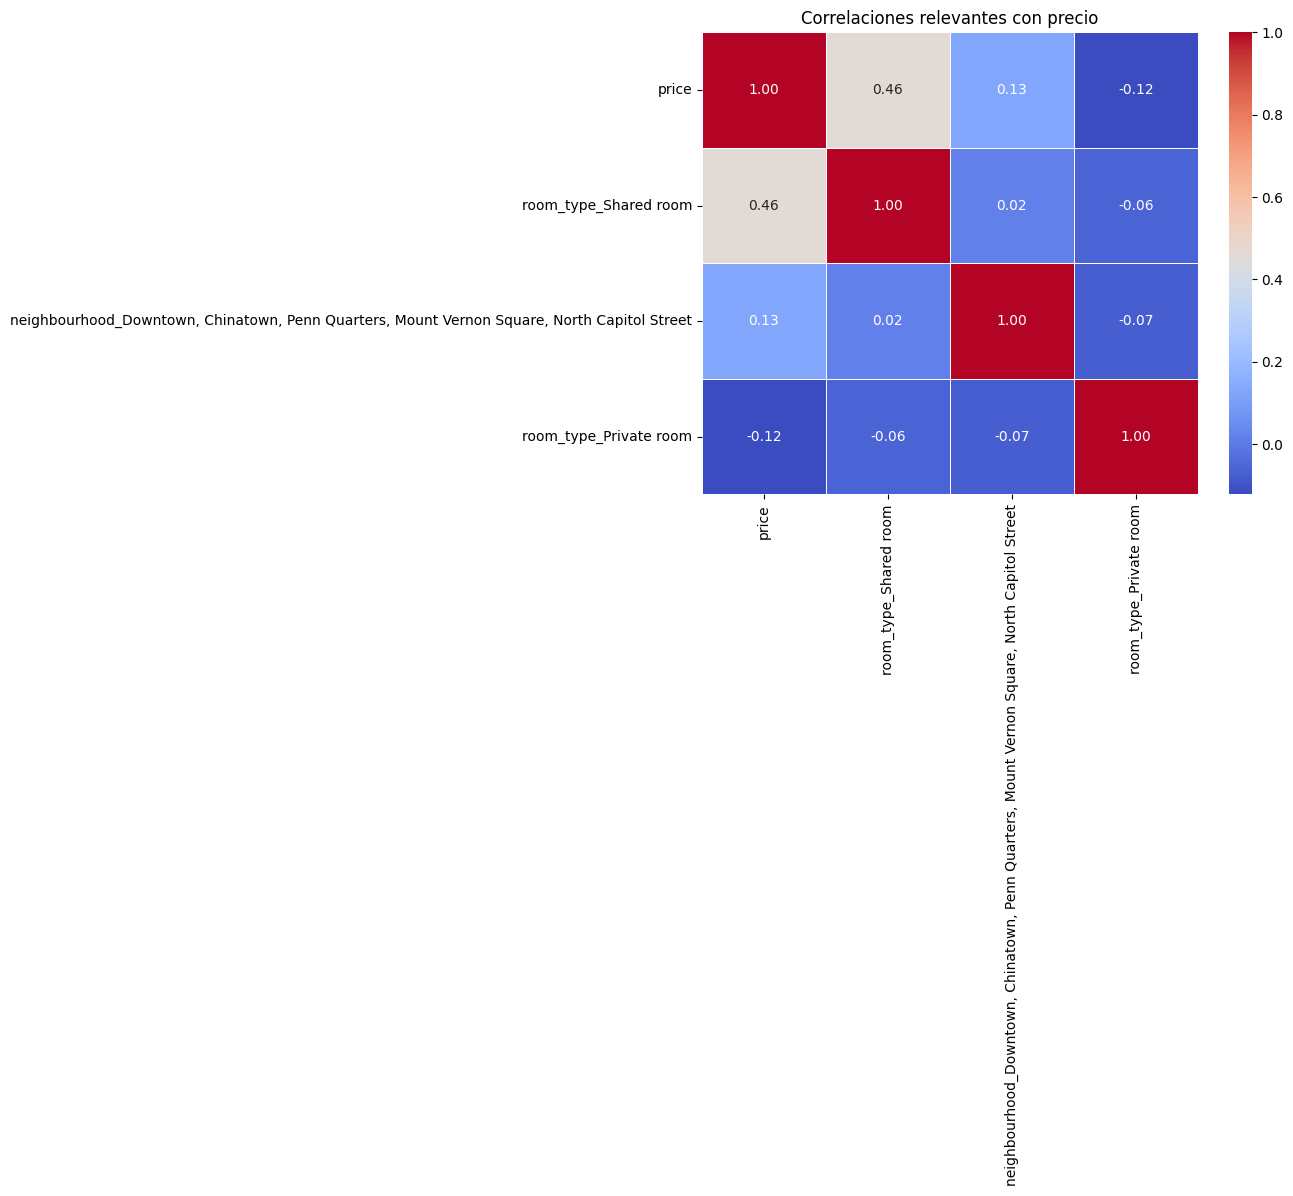

In [32]:
# Aplicar One-Hot Encoding para convertir las variables categóricas en variables numéricas
data_encoded = pd.get_dummies(data_cleaned, columns=['neighbourhood', 'room_type'], drop_first=True)

# Calcular la matriz de correlación para las variables numéricas
correlation_matrix = data_encoded.corr()


# Extraer las correlaciones con respecto a 'price'
price_correlations = correlation_matrix['price'].sort_values(ascending=False)

# Filtrar solo las correlaciones con 'price' mayores a 0.3 o menores a -0.3
relevant_correlations = price_correlations[(price_correlations > 0.1) | (price_correlations < -0.1)]

# Mostrar el resultado
print(relevant_correlations)

# Graficar sólo las correlaciones relevantes
plt.figure(figsize=(8, 6))
sns.heatmap(data_encoded[relevant_correlations.index].corr(), annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title('Correlaciones relevantes con precio')
plt.show()


Solo con las correlaciones podemos ver que el precio está ligado entonces al tipo de cuarto y al barrio en el que se encuentra. Esto nos servirá mas adelante.

### Distribuciones de Variables top 5


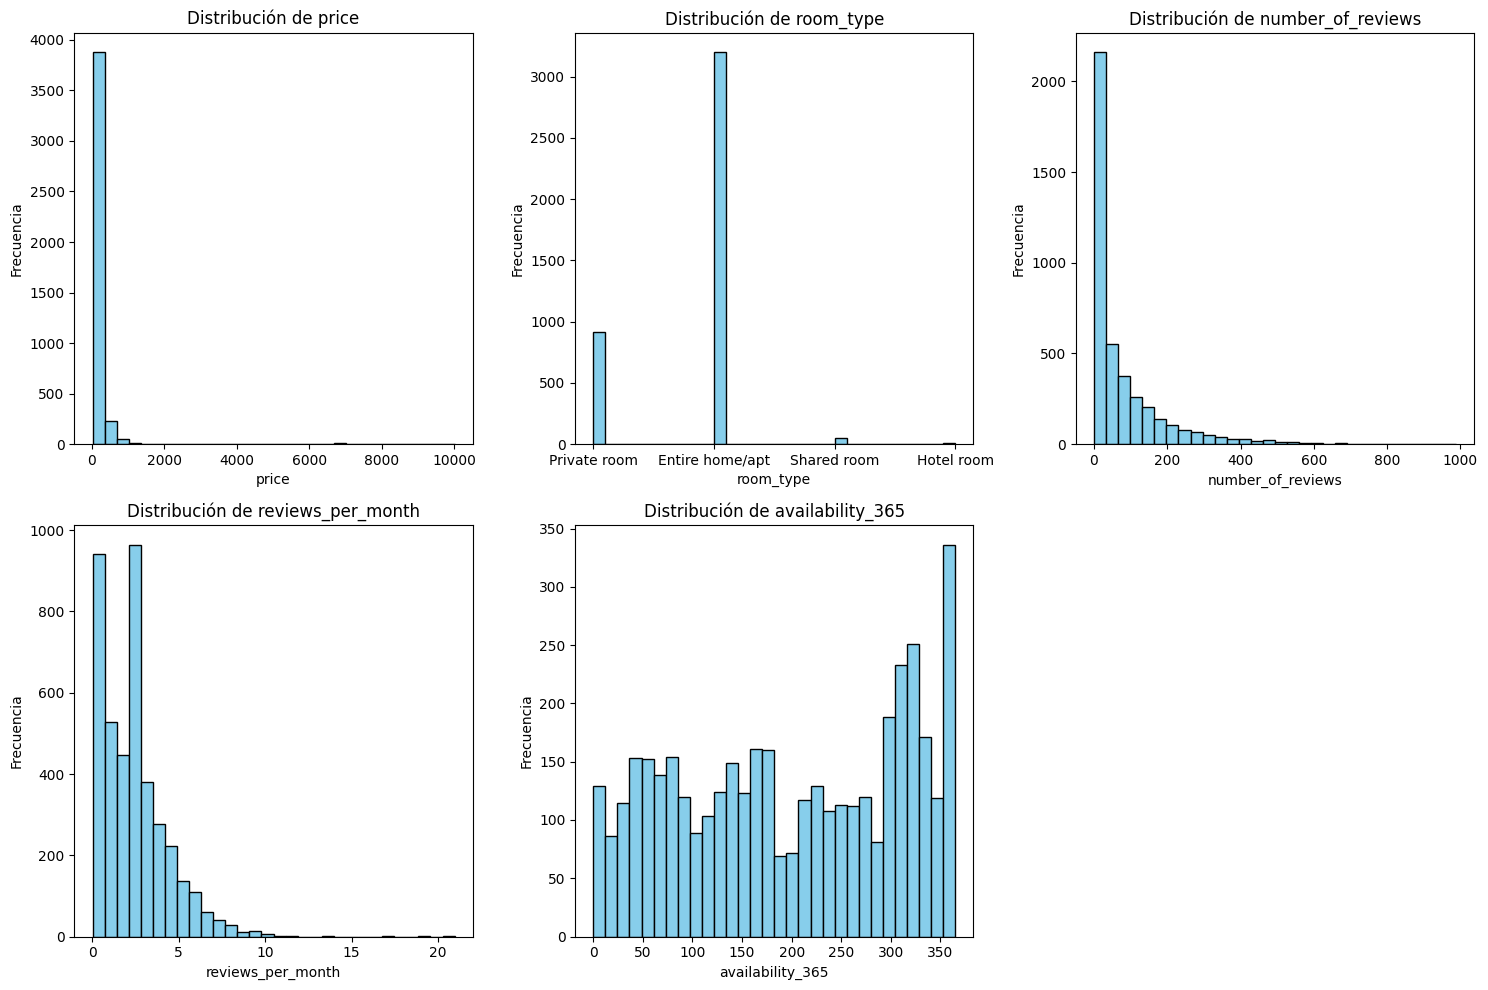

In [34]:
# Listar las variables que queremos visualizar
variables_to_plot = ['price', 'room_type', 'number_of_reviews', 'reviews_per_month', 'availability_365']

# Crear una figura con subplots
plt.figure(figsize=(15, 10))

# Generar un gráfico para cada variable
for i, var in enumerate(variables_to_plot, 1):
    plt.subplot(2, 3, i)  # Crear un subplot de 2 filas y 3 columnas
    plt.hist(data_cleaned[var], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

La gráfica muestra que la gran mayoría de los precios están concentrados entre 0 y 500, pero existen valores atípicos que llegan hasta 10,000. Estos valores extremos son inusuales y podrían distorsionar el análisis. Es recomendable revisar estos outliers y considerar si deben eliminarse o ajustarse, ya que probablemente se trata de errores o listados de características muy particulares que no representan el comportamiento general.

In [35]:
Q1 = data_cleaned['price'].quantile(0.25)
Q3 = data_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Eliminar los registros donde 'price' esté fuera de los límites
data_cleaned = data_cleaned[(data_cleaned['price'] >= lower_bound) & (data_cleaned['price'] <= upper_bound)]

## Reporte

1. Dimensiones del Dataset
El conjunto de datos contiene las siguientes dimensiones:

  Número de filas: 4,184
  Número de columnas: 9
  Este tamaño es manejable para el análisis y permite obtener una buena muestra de los patrones relacionados con el precio de los apartamentos.

2. Tipos de Datos en el Dataset
Los tipos de datos presentes en el dataset son:

  Enteros (integer): Para variables como minimum_nights, number_of_reviews, availability_365.
  Flotantes (float): Para variables numéricas decimales como reviews_per_month.
  Cadenas de texto (string/object): Para variables categóricas como neighbourhood, room_type.

3. Top 5 de Atributos Importantes para el Análisis

  3.1 price (Precio)
  Descripción: Precio diario al que se renta el apartamento.
  Tipo de dato: Entero
  Distribución:
  La media del precio es aproximadamente 95, con un rango que varía entre 40 y 500.
  Hay algunos valores atípicos que fueron eliminados.

  3.2 room_type (Tipo de habitación)
  Descripción: Tipo de habitación ofrecida (entero, privada, compartida, hotel).
  Tipo de dato: Categórico
  Distribución:
  Las categorías más comunes son "Entire home/apt" y "Private room".
  Los "Shared room" y "Hotel room" representan una fracción menor, pero aún son relevantes.
  Este atributo es clave para entender la variabilidad de los precios según el tipo de alojamiento.

  3.3 neighbourhood (Vecindario)
  Descripción: Vecindario en el que se encuentra el apartamento.
  Tipo de dato: Categórico
  Distribución:
  Los vecindarios más frecuentes incluyen zonas como "Capitol Hill" y "Georgetown", lo que indica áreas de mayor actividad.
  Hay más de 40 vecindarios distintos, lo que sugiere que la ubicación juega un rol importante en los precios.

  3.4 number_of_reviews (Número de reseñas)
  Descripción: Número total de reseñas recibidas por el apartamento.
  Tipo de dato: Entero
  Distribución:
  El número de reseñas varía significativamente, con algunos apartamentos que tienen más de 100 reseñas y otros muy pocas o ninguna.
  

  3.5 availability_365 (Disponibilidad en días)
  Descripción: Número de días en que el apartamento está disponible durante el año.
  Tipo de dato: Entero
  Distribución:
  La disponibilidad media es de 200 días, con algunos apartamentos disponibles casi todo el año y otros con menor disponibilidad.
  Este atributo podría ayudar a entender la oferta y demanda del apartamento en relación con su precio.

4. Conclusiones Iniciales
Este análisis inicial sugiere que los precios están influenciados por una combinación de factores como el tipo de habitación, el vecindario y la disponibilidad. Algunos apartamentos tienen reseñas muy altas, lo que podría afectar su popularidad y su precio. La disponibilidad a lo largo del año también juega un papel importante en la competitividad del apartamento.


## Estrategia



El uso de un árbol de decisión en este contexto de negocio es altamente pertinente porque permite analizar las relaciones entre las variables y el precio de alquiler a la vez que visualizar de manera clara cómo influyen factores como la ubicación, el tipo de propiedad y la disponibilidad en el éxito del alquiler vacacional. En lugar de simplemente predecir un valor, el árbol de decisión ayuda a descomponer el problema en decisiones más simples y jerárquicas, lo que proporciona un entendimiento profundo de cómo cada atributo afecta el retorno de inversión. Esto es clave para un inversionista inmobiliario, ya que podrá identificar qué características tienen el mayor impacto en el precio, optimizando así su estrategia de inversión.

Además, la interpretabilidad de un árbol de decisión es particularmente valiosa en el sector inmobiliario. El inversionista no solo quiere saber qué propiedades podrían generar más ingresos, sino también entender por qué. Un árbol de decisión brinda una estructura clara donde se pueden ver los caminos de decisión que llevan a ciertos precios y niveles de ocupación, facilitando la toma de decisiones fundamentadas. Esta capacidad de visualizar las interacciones entre múltiples variables permite que los inversionistas ajusten sus estrategias basadas en el tipo de propiedad y vecindario, asegurando que su inversión maximice la rentabilidad.

## Desarrollo de la Estrategía

Convertimos las variables categóricas neighbourhood y room_type en variables numéricas utilizando One-Hot Encoding.

In [37]:
data_encoded = pd.get_dummies(data_cleaned, columns=['neighbourhood', 'room_type'], drop_first=True)
data_encoded.head()

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,"neighbourhood_Brookland, Brentwood, Langdon","neighbourhood_Capitol Hill, Lincoln Park","neighbourhood_Capitol View, Marshall Heights, Benning Heights",...,"neighbourhood_Spring Valley, Palisades, Wesley Heights, Foxhall Crescent, Foxhall Village, Georgetown Reservoir","neighbourhood_Takoma, Brightwood, Manor Park","neighbourhood_Twining, Fairlawn, Randle Highlands, Penn Branch, Fort Davis Park, Fort Dupont","neighbourhood_Union Station, Stanton Park, Kingman Park","neighbourhood_West End, Foggy Bottom, GWU","neighbourhood_Woodland/Fort Stanton, Garfield Heights, Knox Hill","neighbourhood_Woodridge, Fort Lincoln, Gateway",room_type_Hotel room,room_type_Private room,room_type_Shared room
0,4645,67.0,31,84,0.51,321,2,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,5059,82.0,1,504,2.74,313,34,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,5061,135.0,7,61,0.33,335,8,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,5803,66.0,30,102,0.56,179,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5,5782,66.0,31,23,0.13,340,1,False,False,False,...,False,False,False,False,False,False,False,False,True,False


Dividimos el dataset para entrenar el modelo y luego evaluarlo.

In [38]:

X = data_encoded.drop(columns=['price'])
y = data_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape



((3107, 47), (777, 47))

Entrenamos un modelo de árbol de decisión para predecir el precio basado en las variables disponibles.

In [39]:
# Crear el modelo de Árbol de Decisión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

Evaluamos el modelo usando métricas como el error cuadrático medio y el coeficiente de determinación (R²).

In [40]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")

Error Cuadrático Medio (MSE): 6107.4034749034745
Coeficiente de Determinación (R²): -0.2351746221872022


El Error Cuadrático Medio (MSE) de 6107.40 indica que, en promedio, las predicciones del modelo de árbol de decisión se desvían del valor real en aproximadamente 6107 unidades cuadráticas. Este valor sugiere que el modelo tiene un nivel de error relativamente alto en la predicción de precios, lo que se traduce en qque no está capturando de manera efectiva las relaciones entre las variables y el precio.

El Coeficiente de Determinación (R²) de -0.235 indica que el modelo está rindiendo peor que una simple línea de base que predijera el valor promedio del precio en todos los casos.

Estos resultados indican que el modelo necesita ajustes significativos. Usaremos entonces un random forest.

In [41]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, R²: {r2_rf}")


Random Forest - MSE: 2971.3806262212343, R²: 0.39906149029638316


El Random Forest ha mejorado significativamente los resultados en comparación con el árbol de decisión inicial.

Error Cuadrático Medio (MSE): 2971.38: Este valor indica que el modelo Random Forest tiene un error promedio más bajo que el modelo anterior. Esto significa que las predicciones del precio son más precisas en comparación con el árbol de decisión. Aunque el MSE aún es algo elevado, representa una mejora importante respecto al error anterior.

Coeficiente de Determinación (R²): 0.399: El valor de R² ha mejorado considerablemente. Un R² de 0.399 significa que aproximadamente el 40% de la variabilidad en el precio de los apartamentos se explica por las variables incluidas en el modelo. Aunque no es perfecto es algo bueno para concluir.

Recordemos igual que nuestra intención no es predecir sino encontrar explicación en las variables por lo que aunque perdamos interpretabilidad con el random forest, dado que está mejor ajustado a los datos asumiremos esta perdida.

Visualizamos qué variables fueron más importantes para el modelo de Random Forest.

<ipython-input-42-f88cc7035a02>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_importance, palette='viridis')


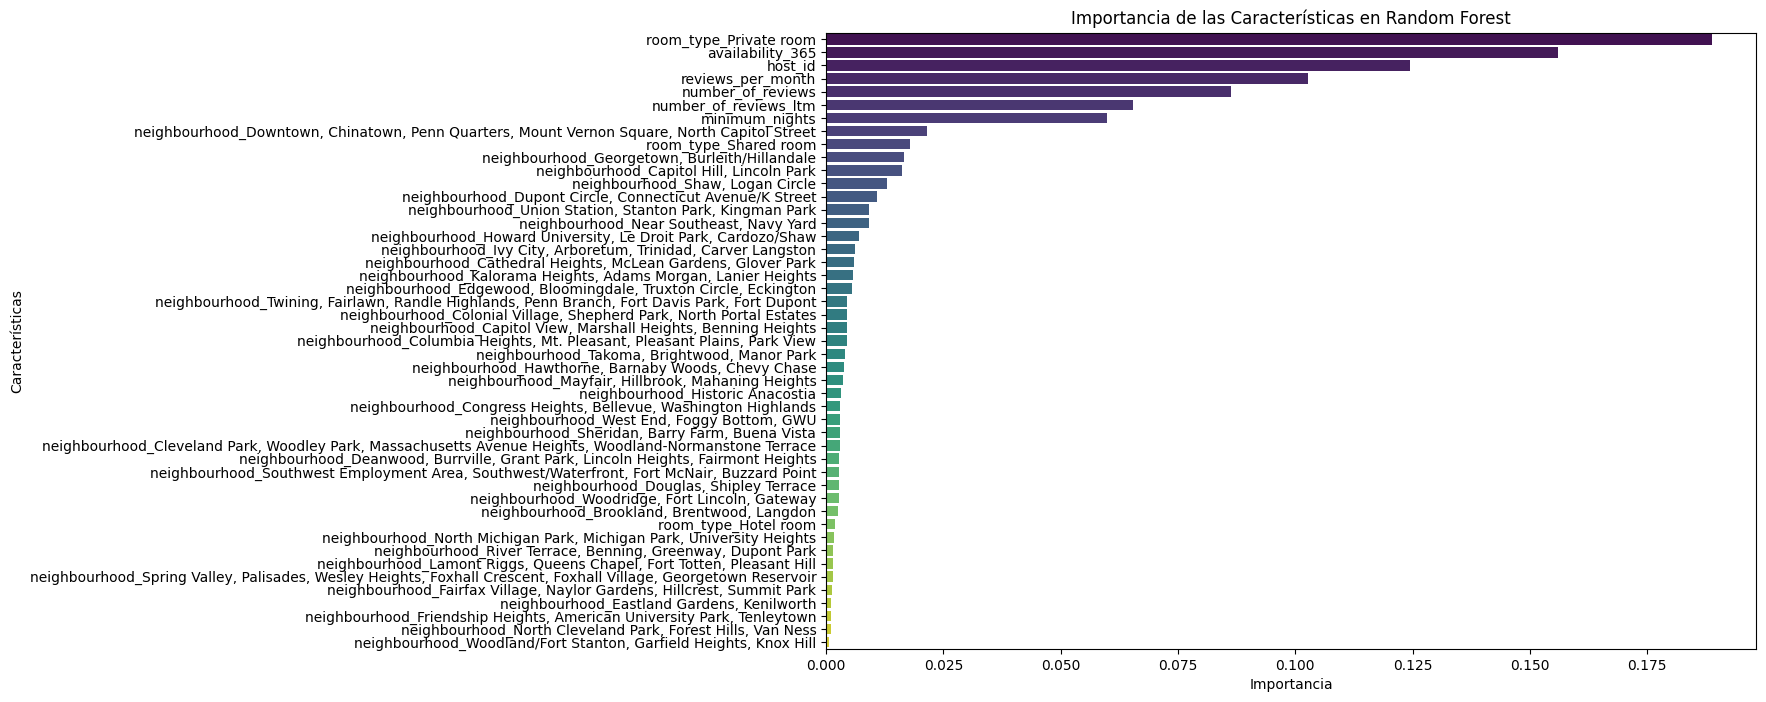

In [42]:

importances = rf_model.feature_importances_

features_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_importance, palette='viridis')
plt.title('Importancia de las Características en Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

No se ve muy bien. lo recortaremos a 10:

<ipython-input-43-b8b80d4bb652>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')


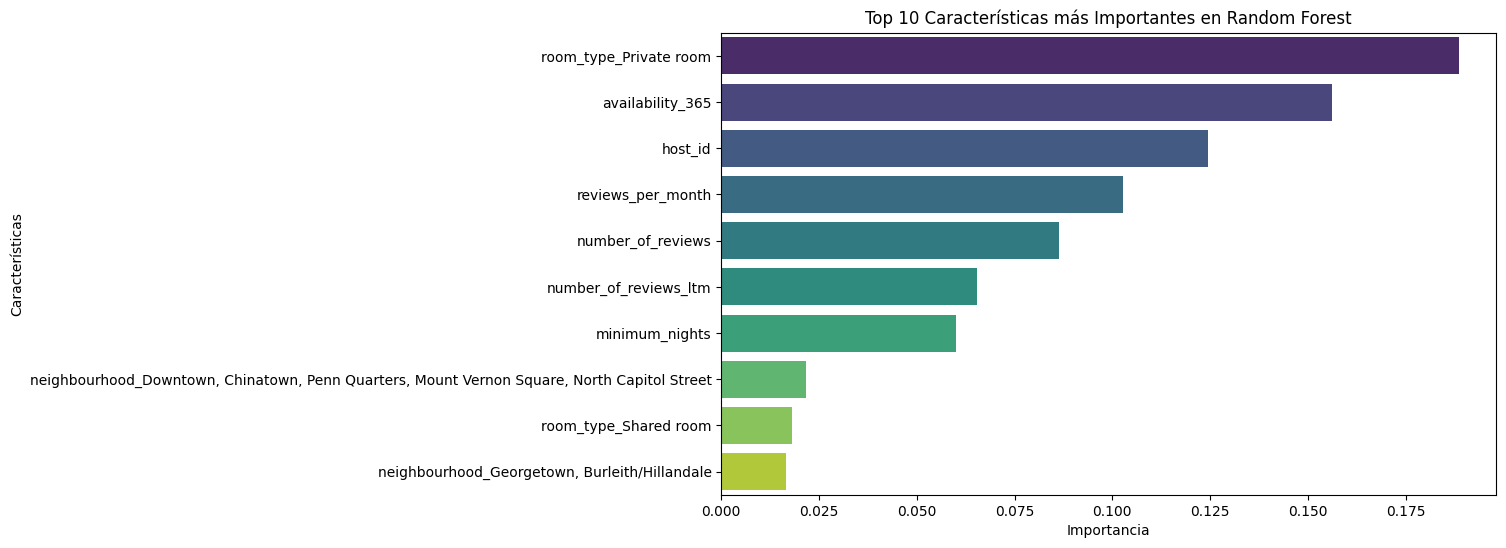

In [43]:

top_10_features = features_importance.head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')
plt.title('Top 10 Características más Importantes en Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

## Insight:

1. El tipo de habitación es la característica más influyente en el precio. En particular, las habitaciones privadas (Private room) tienen un impacto significativo. Esto sugiere que, en comparación con otros tipos de alojamiento, como casas enteras o habitaciones compartidas, las habitaciones privadas son un fuerte indicador del precio.

  Al vincular estos resultados con el mercado, observamos que los cuartos privados son altamente demandados, especialmente por viajeros de negocios o parejas que buscan opciones más económicas en comparación con el alquiler de una casa entera. Aunque los precios de las habitaciones privadas son generalmente más bajos, este tipo de alojamiento tiende a tener una mayor rotación, lo que refuerza su popularidad y frecuencia de renta.

2. La disponibilidad de la propiedad a lo largo del año es la segunda variable más influyente. Las propiedades con más días disponibles suelen tener una relación importante con el precio, probablemente porque una mayor disponibilidad refleja una demanda constante.

  En un contexto real, la flexibilidad de fechas permite a los consumidores ajustar mejor su estancia, lo que satisface una necesidad clave para los viajeros. Esta flexibilidad puede hacer que los clientes estén dispuestos a pagar un poco más para asegurarse de que las fechas se alineen con sus planes, lo que influye en el aumento del precio.

3. El ID del anfitrión es la tercera variable más relevante, lo que sugiere que la experiencia del anfitrión o ciertas características de su servicio pueden estar estrechamente relacionadas con el precio. Esto puede correlacionarse con anfitriones que manejan múltiples propiedades o con aquellos que son "superhosts", lo que tiene un impacto significativo en la fijación de precios.

  En el mundo de Airbnb, los superhosts son anfitriones que destacan por su dedicación al servicio, manteniendo sus propiedades en condiciones excepcionales y ofreciendo detalles adicionales que mejoran la experiencia del huésped. Estos esfuerzos suelen aumentar la disposición de los clientes a pagar más por una estancia de calidad.

4. Las reviews si afectan el precio. En un negocio como AIRBNB es razonable pensar que los consumidores al tener información necesaria para comparar entre apartamentos se toman su tiempo para leer los comentarios y experiencias de los clientes que se han hospedado en el apartamento. Por ende es importante motivar al consumidor que deje sus comentarios en la pagina de su experiencia.

